In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\STAR\\Downloads\\archive (4)\\test.csv')

In [3]:
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES
0,655269,53478,63558,86.54,67,22807,45,1497,01-01-1974,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
1,723482,55513,63163,89.45,67,22807,45,1497,20-05-1985,Self employed,...,0,0,0,5605,0,1,0,0yrs 8mon,1yrs 0mon,1
2,758529,65282,84320,79.93,78,23135,86,2071,14-10-1995,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0
3,763449,46905,63896,76.58,78,17014,45,2070,01-06-1973,Self employed,...,0,0,0,0,0,0,0,2yrs 5mon,2yrs 5mon,0
4,708663,51428,63896,86.08,78,17014,45,2069,01-06-1972,Salaried,...,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 40 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             112392 non-null  int64  
 1   DISBURSED_AMOUNT                     112392 non-null  int64  
 2   ASSET_COST                           112392 non-null  int64  
 3   LTV                                  112392 non-null  float64
 4   BRANCH_ID                            112392 non-null  int64  
 5   SUPPLIER_ID                          112392 non-null  int64  
 6   MANUFACTURER_ID                      112392 non-null  int64  
 7   CURRENT_PINCODE_ID                   112392 non-null  int64  
 8   DATE_OF_BIRTH                        112392 non-null  object 
 9   EMPLOYMENT_TYPE                      108949 non-null  object 
 10  DISBURSAL_DATE                       112392 non-null  object 
 11  STATE_ID     

In [6]:
df.describe()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,STATE_ID,EMPLOYEE_CODE_ID,...,SEC_ACTIVE_ACCTS,SEC_OVERDUE_ACCTS,SEC_CURRENT_BALANCE,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES
count,112392.000000,112392.000000,1.123920e+05,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,112392.000000,...,112392.000000,112392.000000,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,1.123920e+05,112392.000000,112392.000000,112392.000000
mean,711741.891861,56076.803269,7.718639e+04,75.310325,78.902591,19843.303545,68.366031,3014.001352,7.215754,1771.651541,...,0.012350,0.003176,2.776081e+03,3.721477e+03,3.671156e+03,1.123698e+04,1.679060e+02,0.314907,0.091884,0.226119
std,33492.215991,13123.697627,1.827149e+04,11.006380,71.469633,3555.303301,22.137265,2223.215364,4.679847,1104.533635,...,0.198374,0.073784,1.406059e+05,2.015516e+05,2.013686e+05,2.741250e+05,1.763841e+04,0.843406,0.381809,0.739231
min,654115.000000,11613.000000,4.011700e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,-3.882000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,682658.750000,48849.000000,6.751000e+04,69.970000,15.000000,16633.000000,45.000000,1312.000000,4.000000,801.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,711522.500000,55359.000000,7.258400e+04,77.780000,67.000000,20675.000000,86.000000,2412.000000,6.000000,1664.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
75%,740851.250000,62147.000000,8.004000e+04,83.740000,136.000000,23170.000000,86.000000,5092.000000,10.000000,2694.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.855000e+03,0.000000e+00,0.000000,0.000000,0.000000
max,769909.000000,940690.000000,1.271553e+06,95.000000,261.000000,24901.000000,155.000000,7345.000000,22.000000,3923.000000,...,20.000000,8.000000,3.579410e+07,5.794500e+07,5.794500e+07,8.526233e+07,5.390000e+06,22.000000,18.000000,23.000000


In [9]:
df.iloc[:,32:40].columns

Index(['SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES'],
      dtype='object')

<AxesSubplot:ylabel='Density'>

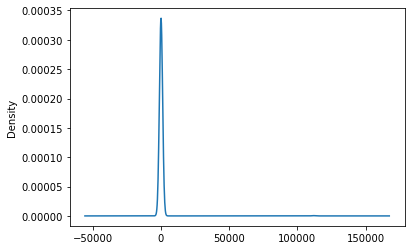

In [15]:
df['SEC_DISBURSED_AMOUNT'].value_counts().plot(kind='kde')

In [ ]:
sns.boxplot([])